<a href="https://colab.research.google.com/github/shwetaNayak19/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

uring the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement(suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevantitems to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


# **Content**

The Book-Crossing dataset comprises 3 files.
*  Users
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

*  Books
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

* Ratings
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

## **Importing Packages**

In [1]:
#loading modules required in our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#set style for graph
sns.set_style(style='darkgrid')

#set max columns display limit
pd.set_option("display.max_columns",None)

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## **Data Preparation**

## **Mounting Drive**

In [3]:
#mouting google drive to load dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading data in notebook**

In [6]:
#books dataset
books = pd.read_csv('/content/drive/MyDrive/Book Recommendation System/Books.csv')
#users dataset
users = pd.read_csv('/content/drive/MyDrive/Book Recommendation System/Ratings.csv')
#ratings dataset 
ratings = pd.read_csv('/content/drive/MyDrive/Book Recommendation System/Users.csv')

## **Data Inspection**

In [7]:
#first look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#first look
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
#first look
ratings.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [10]:
users.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [11]:
ratings.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [12]:
#check information about data
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


from above we can see that we have some null values in Age column in users dataset.

In [15]:
#check descriptive statistics
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0195153448,1
Book-Title,271360,242135,Selected Poems,27
Book-Author,271359,102023,Agatha Christie,632
Year-Of-Publication,271360,202,2002,13903
Publisher,271358,16807,Harlequin,7535
Image-URL-S,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-M,271360,271044,http://images.amazon.com/images/P/185326119X.0...,2
Image-URL-L,271357,271041,http://images.amazon.com/images/P/225307649X.0...,2


In [16]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [17]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,278858.0,139429.500000,80499.515020,1.0,69715.25,139429.5,209143.75,278858.0
Age,168096.0,34.751434,14.428097,0.0,24.00,32.0,44.00,244.0


*  We have age ranges from 24 to 44 but we can see that in max we have 244 which is not quite possible. This might be typing mistake in dataset 2 is added mistakenly.
* Agatha Christie is the Author of most of the book (632).
* In year 2002 most number of books was Published.
* Harlequin is the Publisher of 7535 books.

In [18]:
#dimension of dataset
print(f'books dataframe shape: {books.shape}\nratings dataframe shape: {ratings.shape}\nusers dataframe shape: {users.shape}')

books dataframe shape: (271360, 8)
ratings dataframe shape: (278858, 3)
users dataframe shape: (1149780, 3)


## **Checking Missing values**

In [19]:
for i in [users,books,ratings]:
  print((i.isnull().sum()))

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


* We have maximum number of null values in age column 110762.
* We have 1,2,3 null values in Book-Author,Publisher,Image-URL-L respectively.

In [20]:
#check for duplicate rows
for i in [users,books,ratings]:
  print(i.duplicated().value_counts())

False    1149780
dtype: int64
False    271360
dtype: int64
False    278858
dtype: int64


* As we can see their are no duplicate rows in dataset.

## **EDA**

## **1-Books Dataframe**

Let's check which Author has published maximum number of books.

In [21]:
#top author who published books
top_authors = books['Book-Author'].value_counts().reset_index()
top_authors.columns = ['Author', 'count']
top_authors['Author'] = top_authors['Author']
top_authors = top_authors.sort_values('count',ascending=False)
top_authors.head()

,Author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373


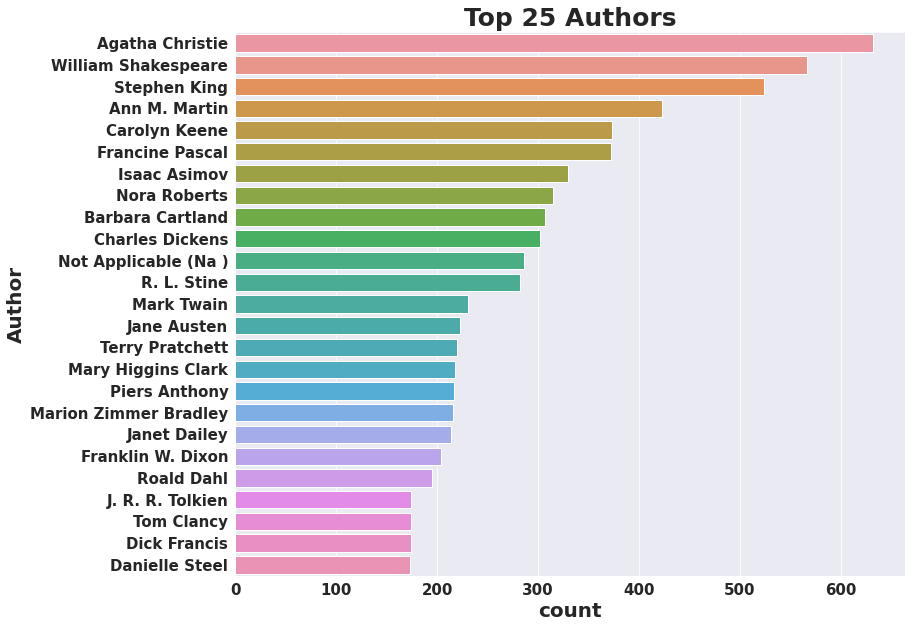

In [22]:
#plotting top 25 authors
plt.figure(figsize =(12,10))
sns.barplot(data = top_authors.head(25), x = 'count', y = 'Author')
plt.title('Top 25 Authors');

* Agatha Christie and William Shakespeare has contributed maximum as a Author.

Let's check top Publisher

In [23]:
#top  publishers
top_publishers = books['Publisher'].value_counts().reset_index()
top_publishers.columns = ['Publisher', 'count']
top_publishers['Publisher'] = top_publishers['Publisher']
top_publishers = top_publishers.sort_values('count',ascending=False)
top_publishers.head()

,Publisher,count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3646


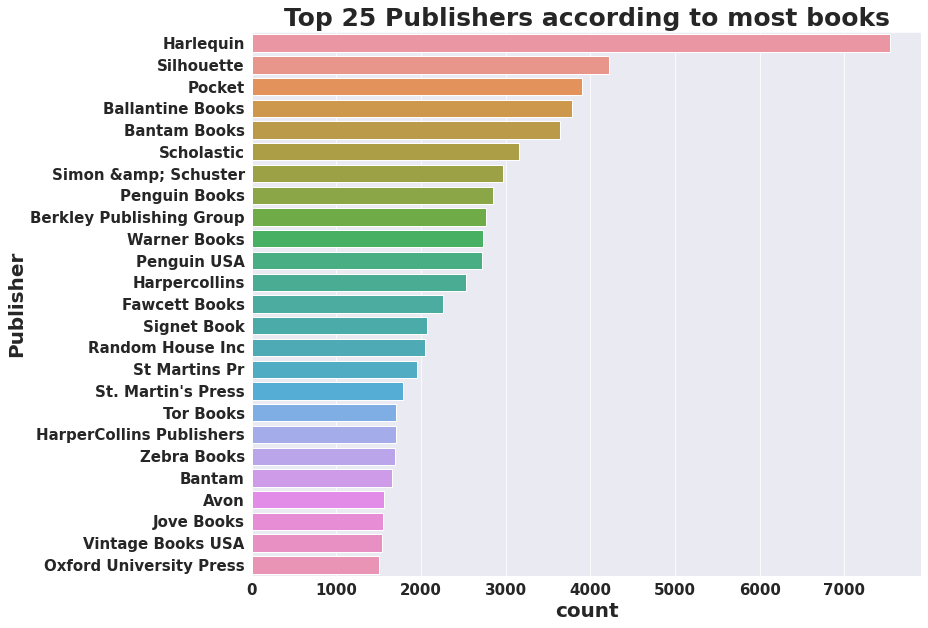

In [24]:
#plotting top 10 authors
plt.figure(figsize=(12,10))
sns.barplot(data = top_publishers.head(25), x = 'count', y = 'Publisher')
plt.title('Top 25 Publishers according to most books');

* Harlequin is the Publisher of maxiumum number of books.

Visualizing Year of Publications

In [25]:
#top year of publication

yearOP = books['Year-Of-Publication'].value_counts().reset_index()
yearOP.columns = ['value', 'count']
yearOP['year'] = yearOP['value'].astype(str) + ' year'
yearOP = yearOP.sort_values('count',ascending=False)
yearOP.head()



,value,count,year
0,2002,13903,2002 year
1,2001,13715,2001 year
2,1999,13414,1999 year
3,2000,13373,2000 year
4,1998,12116,1998 year


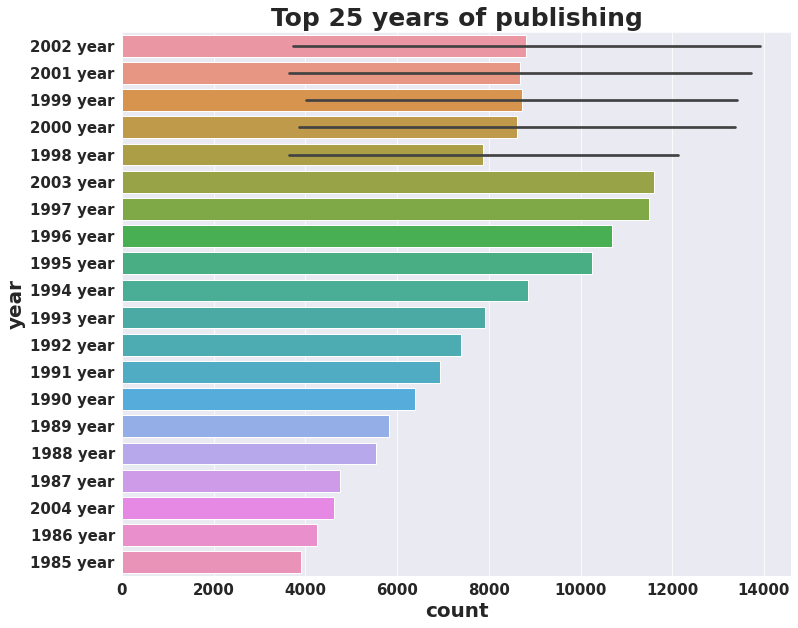

In [26]:
#plotting year of publications
plt.figure(figsize=(12,10))
plt.title('Top 25 years of publishing')
sns.barplot(data = yearOP.head(25), x='count', y="year");

Let's check Year of Publication

In [27]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'


We can observe from above that some author names are mixed up in year data like 'DK Publishing Inc' and 'Gallimard'. We have to check those rows to understand why?


In [28]:
#Checking the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


There are Two Books with wrong year entries, Hence we will correct them below

In [29]:
# making required correction for ISBN 078946697X
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [30]:
#making correction for ISBN 0789466953
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

Checking the rows having 'Gallimard' as yearOfPublication

In [31]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


There are only one book with wrong entry. LEt's make changes.

In [32]:
##making correction for ISBN 2070426769
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


In [ ]:
#verifying the correction  made
books.loc[(books.ISBN == '2070426769') | (books.ISBN == '078946697X') | (books.ISBN == '0789466953')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [33]:
#converting year of publication to numeric
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
print(books['Year-Of-Publication'].unique())
#Now it can be seen that yearOfPublication has all values as integers

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984
    0 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973
 1972 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950
 1967 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947
 1945 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927
 1931 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917
 1901 2010 1908 1906 1935 1806 2021 2012 2006 1909 2008 1378 1919 1922
 1897 2024 1376 2037]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be invalid and setting up these invalids years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [34]:
#setting Nan for wrong years
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [35]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [36]:
#storing Image URL in new dataframe which is not required for our analysis
books_image_url_data = books[['ISBN','Book-Title', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L' ]]

books_image_url_data.head()

,ISBN,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [37]:
#dropping url columns from our dataframe which is not required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)


In [38]:
#checking null values in books
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

* We have 1 and 2 null values in Book Author and Publisher Column. We will replace them by Other.

In [39]:
#checking null in publisher column
books.loc[books.Publisher.isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [40]:
#replacing null values with othe rin Publisher columns
books.Publisher.fillna('other',inplace=True)

In [41]:
#checking null in Book Author
books.loc[books['Book-Author'].isnull()]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [42]:
#Replacing NaN of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [43]:
#checking null values to verify
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## **2 - Users Dataframe**

In [ ]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [44]:
#checking null values in dataset
users.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

As we can se age columns has 110762 null values before treating them let's check distribution of age.

In [46]:
#check unique locations
users['Location'].unique()

KeyError: ignored

In [47]:
#checking unique count of countries
users['Location'].nunique()

KeyError: ignored

We got unique count of countries 57339 which doesn't make any sense. So let's createe new column country.

In [ ]:
#making country column via Location
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
#checking unique country
users['Country'].nunique()

529

In [ ]:
#convert country columns to str
users['Country']=users['Country'].astype('str')

In [ ]:
#checking input error in country
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [ ]:
#correction of those input error 
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us','england','england uk','english','europa','holland','hongkong'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa','united kingdom','united kingdom','united kingdom','europe','polland','hong kong'],inplace=True)

We only changed some most common spelling mistake so we will treat other misspelled as a location.

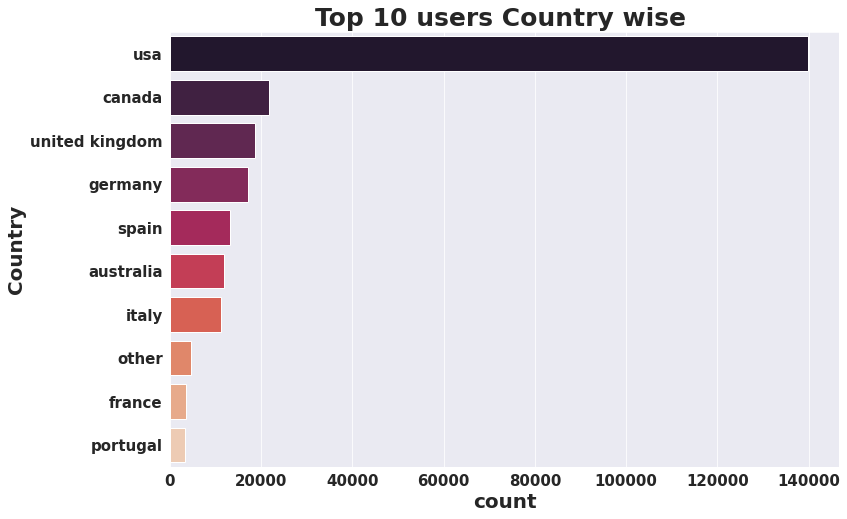

In [ ]:
#let's check top 10 users country wise
plt.figure(figsize=(12,8))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index, palette = 'rocket')
plt.title('Top 10 users Country wise ');

 We can clearly see that maximum number of customer are from USA. It's almost six times more than second highest country canada.

In [ ]:
#let's drop location columns we don't want two column related to location
users.drop('Location',axis=1,inplace=True)

In [ ]:
#unique values in age columns
print(users['Age'].unique())

[ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


As we can see there are age more than 100 and less than 5 that doesn't make sense as such small age children hardly read and above 100 is not possible it's very rare case.

## **Outlier treatment**

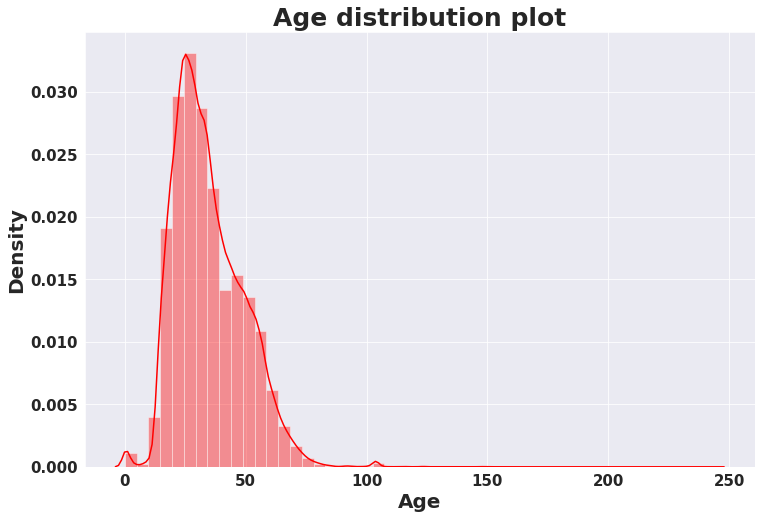

In [ ]:
#plotting distribution of age
plt.figure(figsize=(12,8))
sns.distplot(users['Age'],color='r')
plt.title('Age distribution plot');

We can see age distribution is maximum around 20-40 age and the other which are outliers and don't make sense we are going to replace them.

In [ ]:
#first make outlier nan 
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [ ]:
#checking null values
users.isnull().sum()

User-ID          0
Location         0
Age         112010
dtype: int64

Age has positive skewness (right skewed) so we can use median value to fill the values but we know that different country and different age reader and also country wise distribution can be different for that we going to fill median by grouping country wise.

In [ ]:
#filling nan by median value
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [ ]:
#checking null values again
users.isnull().sum()

User-ID      0
Age        273
Country      0
dtype: int64

There are still some null values, let's fill them with mean

In [ ]:
#filling rest nan by mean
users['Age'].fillna(users.Age.mean(),inplace=True)

In [ ]:
#checking once again to confirm
users.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64